In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/accenture-final-datset/final_datasheet (1).xlsx


In [116]:
cleaned_df = pd.read_excel("/kaggle/input/accenture-final-datset/final_datasheet (1).xlsx", sheet_name=0)
cleaned_df.head()

,Content ID,Datetime,Content Type,Category,Reaction Type,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,2020-11-07 09:43:50,photo,Studying,disgust,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,2021-01-06 19:13:01,photo,Studying,disgust,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,2021-04-09 02:46:20,photo,Studying,disgust,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,2021-03-28 21:15:26,photo,Healthy eating,disgust,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,2020-08-04 05:40:33,photo,Healthy eating,disgust,0


In [97]:
topcat_df = pd.read_excel("/kaggle/input/accenture-final-datset/final_datasheet (1).xlsx", sheet_name=1, index_col=0)
topcat_df

,Score
Category,
Animals,74654
Science,70914
Healthy eating,69094
Technology,68429
Food,66089


<Figure size 600x600 with 0 Axes>

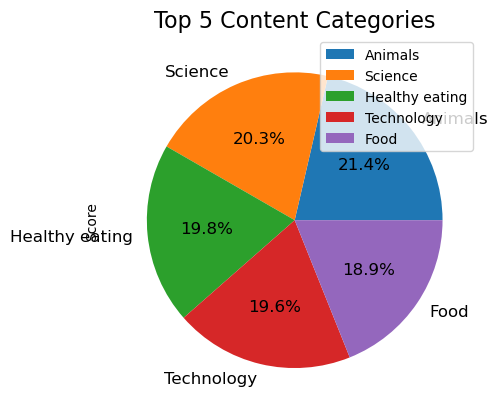

In [104]:
from matplotlib import pyplot as plt
fig = plt.figure(1, figsize=(6,6))

topcat_df.plot.pie(y="Score", autopct='%1.1f%%',textprops={'fontsize': 12})

plt.title("Top 5 Content Categories", fontdict={ 'fontsize': 16})
plt.legend()
plt.show()

In [107]:
unique_cat = cleaned_df.groupby("Category")["Content ID"].count()

len(unique_cat)

16

In [108]:
cleaned_df.groupby("Reaction Type")["Content ID"].count().sort_values(ascending=False)

Reaction Type
heart          1610
scared         1562
peeking        1548
hate           1543
adore          1541
interested     1537
want           1534
love           1530
dislike        1528
disgust        1519
super love     1511
like           1509
indifferent    1507
cherish        1496
worried        1487
intrigued      1465
Name: Content ID, dtype: int64

In [109]:
index = cleaned_df.groupby("Content ID")["Score"].sum().sort_values(ascending=False)[:5].index

In [115]:
cleaned_df.loc[index].groupby("Category")["Reaction Type"].count()

Category
Dogs          46
Food          46
Science       48
Technology    92
Name: Reaction Type, dtype: int64

In [117]:
content_type = cleaned_df.groupby("Content Type")["Content ID"].count().sort_values()
content_type

Content Type
audio    5629
GIF      6041
video    6211
photo    6546
Name: Content ID, dtype: int64

In [118]:
cat_reactions = cleaned_df.groupby("Category")["Reaction Type"].count().sort_values()
cat_reactions

Category
Public speaking    1207
Veganism           1241
Tennis             1321
Dogs               1332
Studying           1356
Fitness            1389
Education          1423
Soccer             1449
Travel             1632
Cooking            1655
Culture            1664
Food               1682
Technology         1688
Healthy eating     1712
Science            1787
Animals            1889
Name: Reaction Type, dtype: int64

In [120]:
animals_df = cleaned_df[cleaned_df["Category"] == "Animals"]
animals_df

animals_react_df = animals_df.groupby("Reaction Type")["Content ID"].count().sort_values()
animals_react_df

Reaction Type
indifferent    100
like           101
interested     110
adore          113
dislike        115
intrigued      116
love           117
worried        119
heart          120
disgust        121
want           121
super love     123
cherish        125
hate           128
peeking        129
scared         131
Name: Content ID, dtype: int64

In [127]:
cleaned_df['Datetime'] = pd.to_datetime(cleaned_df.Datetime, format='%Y-%m-%d %H:%M:%S')
sorted_df = cleaned_df.sort_values("Datetime")
sorted_df

In [128]:
sorted_df.head()

,Content ID,Datetime,Content Type,Category,Reaction Type,Score,month-year
3493,70b0202f-cd58-42fe-acd9-7b2f8cf9e7c6,2020-06-18 08:22:47,video,Cooking,scared,15,2020-6
16651,edea43f3-1541-4e42-8419-d1cdf749025c,2020-06-18 08:51:33,photo,Cooking,intrigued,45,2020-6
4491,a8160135-2d55-4240-8f28-fbee5ec84801,2020-06-18 09:13:59,video,Studying,scared,15,2020-6
23151,6e418568-a2b9-4d08-b241-06362c96a7f1,2020-06-18 10:37:41,video,Food,adore,72,2020-6
5973,fa39acec-96b1-441d-8f85-16dfb44bdfba,2020-06-18 11:33:40,photo,Culture,interested,30,2020-6


In [138]:
# cleaned_df.groupby((cleaned_df.Datetime.year), (cleaned_df.Datetime.month))["Content ID"].count()

sorted_df["month-year"] = cleaned_df["Datetime"].apply(lambda x: str(x.year) + "-" + str(x.month))

sorted_df.groupby("month-year")["Content ID"].count().sort_index()


month-year
2020-10    2038
2020-11    2025
2020-12    2079
2020-6      886
2020-7     2054
2020-8     2102
2020-9     2012
2021-1     2114
2021-2     1908
2021-3     2004
2021-4     1962
2021-5     2122
2021-6     1121
Name: Content ID, dtype: int64

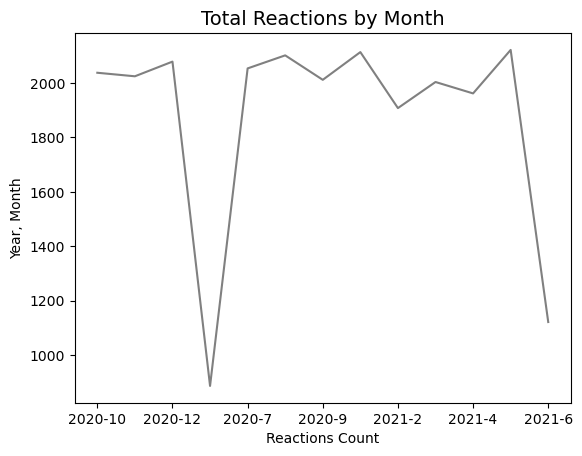

In [139]:
sorted_df.groupby("month-year")["Content ID"].count().sort_index().plot(color="grey")

plt.title("Total Reactions by Month", fontdict={'fontsize':14})
plt.xlabel("Reactions Count")
plt.ylabel("Year, Month")
plt.show()